<a href="https://colab.research.google.com/github/thamonS/python_dataviz2024/blob/main/HW9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import data

In [1]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Data_viz_2024_data'

In [4]:
data_india = pd.read_csv(os.path.join(path,'IMDb_Movies_India.csv'),encoding='latin-1')
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


#clean

In [5]:
data_india['Duration'] = data_india['Duration'].str.replace(' min', '')
data_india['Year'] = data_india['Year'].str.replace('(', '')
data_india['Year'] = data_india['Year'].str.replace(')', '')

In [6]:
data_india['Rating'] = pd.to_numeric(data_india['Rating'], errors='coerce')
data_india['Votes'] = pd.to_numeric(data_india['Votes'], errors='coerce')
data_india['Duration'] = pd.to_numeric(data_india['Duration'], errors='coerce')


data_india = data_india.dropna(subset=['Rating', 'Votes', 'Duration'])

#ทำmatrix

In [7]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# Sample data (replace new_md with your actual dataframe)
# new_md = pd.read_csv('your_data.csv')


# Convert 'Rating' and 'Votes' columns to numeric type before calculation
data_india['Rating'] = pd.to_numeric(data_india['Rating'], errors='coerce')
data_india['Votes'] = pd.to_numeric(data_india['Votes'], errors='coerce')


# Group by 'Director' and calculate the mean for 'Rating' and 'Votes', and count the number of movies directed
director_grouped = data_india.groupby('Director').agg({
    'Rating': 'mean',
    'Votes': 'mean',
    'Name': 'count'  # Count the number of movies directed
}).rename(columns={'Name': 'Movie_Count'}).reset_index()

# Scale 'Votes' and 'Movie_Count' to be out of 100
scaler = MinMaxScaler(feature_range=(0, 100))
director_grouped['Votes_Scaled'] = scaler.fit_transform(director_grouped[['Votes']])
director_grouped['Movie_Count_Scaled'] = scaler.fit_transform(director_grouped[['Movie_Count']])


# Adjust 'Rating' to be out of 100 (assuming the original is out of 10)
director_grouped['Rating_Scaled'] = director_grouped['Rating'] * 10


# Now calculate the 'Director_Score' with the weights:
# 50% from Rating, 30% from Votes, 20% from Movie Count
director_grouped['Director_Score'] = (director_grouped['Rating_Scaled'] * 0.5) + \
                                     (director_grouped['Votes_Scaled'] * 0.3) + \
                                     (director_grouped['Movie_Count_Scaled'] * 0.2)


# Filter to keep only directors with at least 5 movies
director_grouped = director_grouped[director_grouped['Movie_Count'] >= 5]


# Display the result
print(director_grouped[['Director', 'Rating_Scaled', 'Votes_Scaled', 'Movie_Count_Scaled', 'Director_Score']])


                 Director  Rating_Scaled  Votes_Scaled  Movie_Count_Scaled  \
0            A. Bhimsingh      67.857143      8.664628           41.935484   
28    Abdul Rashid Kardar      66.900000      2.742100           29.032258   
64      Adurthi Subba Rao      67.200000      6.177370           12.903226   
75          Ajay Chandhok      31.400000     29.683996           12.903226   
80           Ajay Kashyap      48.000000      6.014271           12.903226   
...                   ...            ...           ...                 ...   
2123          Vijay Bhatt      67.200000      5.820591           29.032258   
2130          Vijay Reddy      51.285714      9.975244           19.354839   
2143         Vikram Bhatt      46.200000     49.439348           45.161290   
2147          Vimal Kumar      43.800000     30.927625           12.903226   
2193          Yash Chopra      64.666667     31.872239           25.806452   

      Director_Score  
0          44.915057  
28         40.079

In [8]:
director_grouped.sort_values(by='Director_Score', ascending=False)

,Director,Rating,Votes,Movie_Count,Votes_Scaled,Movie_Count_Scaled,Rating_Scaled,Director_Score
659,Hrishikesh Mukherjee,7.050000,296.625000,24,29.727319,74.193548,70.500000,59.006905
1797,Shakti Samanta,6.550000,160.468750,32,15.847987,100.000000,65.500000,57.504396
1869,Shyam Benegal,7.264706,327.529412,17,32.877616,51.612903,72.647059,56.509395
1394,Raj Kapoor,6.683333,645.166667,6,65.256541,16.129032,66.833333,56.219435
604,Gulzar,7.275000,362.666667,12,36.459395,35.483871,72.750000,54.409593
...,...,...,...,...,...,...,...,...
929,Kumaar Aadarsh,5.000000,24.400000,5,1.977574,12.903226,50.000000,28.173917
226,Arshad Khan,4.880000,41.400000,5,3.710499,12.903226,48.800000,28.093795
2018,Swaroop Kumar,4.642857,18.571429,7,1.383428,19.354839,46.428571,27.500282
75,Ajay Chandhok,3.140000,296.200000,5,29.683996,12.903226,31.400000,27.185844


In [9]:
def split_genres(row):
  # Check if the genre value is a string before splitting
  if isinstance(row['Genre'], str):
    genres = row['Genre'].split(',')
    return [genre.strip() for genre in genres]
  else:
    # Handle cases where the genre is not a string (e.g., return an empty list or NaN)
    return []
data_india['Genre'] = data_india.apply(split_genres, axis=1)

In [10]:
# Function to split genres and create new rows
def split_genres(row):
  if isinstance(row['Genre'], list):
    new_rows = []
    for i in range(len(row['Genre'])):
      new_row = row.copy()
      new_row['Genre'] = row['Genre'][i]
      new_rows.append(new_row)
    return new_rows
  else:
    return [row]


# Apply the function to split genres and create new rows
new_md = pd.concat([pd.DataFrame(split_genres(row)) for _, row in data_india.iterrows()], ignore_index=True)

#Radar chart

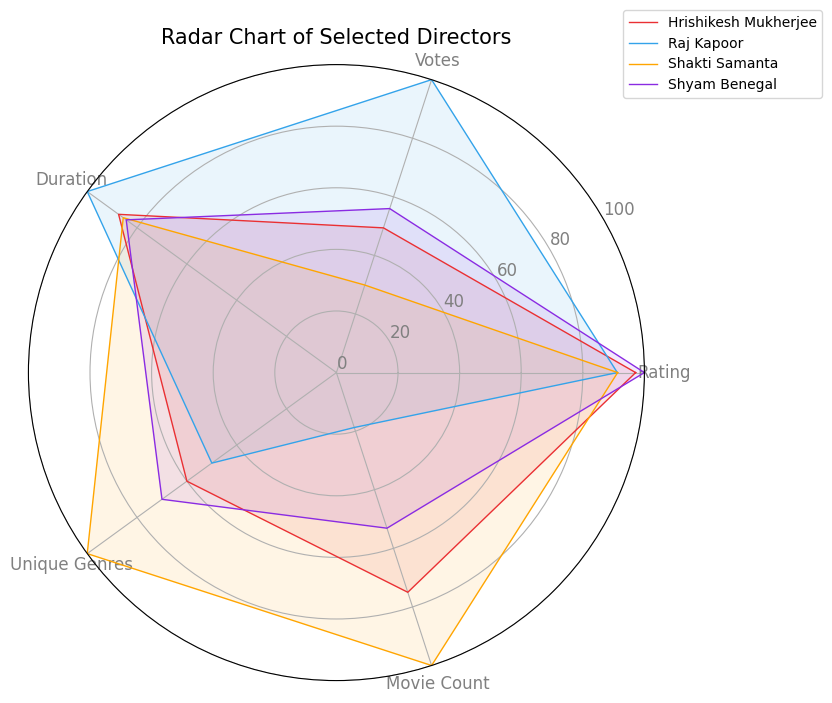

In [11]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 1. Group data by director
director_stats = new_md.groupby('Director').agg({
    'Rating': 'mean',
    'Votes': 'mean',
    'Duration': 'mean',
    'Genre': 'nunique',  # Number of unique genres
    'Name': 'nunique'      # Number of movies
}).reset_index()


# Convert the relevant columns to numeric to ensure they can be used for calculations
director_stats['Rating'] = pd.to_numeric(director_stats['Rating'], errors='coerce')
director_stats['Votes'] = pd.to_numeric(director_stats['Votes'], errors='coerce')
director_stats['Duration'] = pd.to_numeric(director_stats['Duration'], errors='coerce')


# 2. Filter data for selected directors (including Raj Kapoor)
selected_directors = ['Hrishikesh Mukherjee', 'Shakti Samanta', 'Shyam Benegal', 'Raj Kapoor']
director_stats = director_stats[director_stats['Director'].isin(selected_directors)]


# 3. Prepare data for radar chart
categories = ['Rating', 'Votes', 'Duration', 'Unique Genres', 'Movie Count']
values = []


for _, row in director_stats.iterrows():
    values.append([
        row['Rating'],
        row['Votes'],
        row['Duration'],
        row['Genre'],
        row['Name']
    ])


# 4. Normalize values to 100
max_values = np.max(values, axis=0)  # Get max value for each category
normalized_values = (values / max_values) * 100  # Normalize each value to 100


# 5. Create Radar Chart
angles = [n / float(len(categories)) * 2 * math.pi for n in range(len(categories))]
angles += angles[:1]  # Close the circle


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), subplot_kw=dict(polar=True))


plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(0, 110, 20), [str(i) for i in range(0, 110, 20)], color='grey', size=12)
plt.ylim(0, 100)
ax.set_rlabel_position(30)


colors = ['#ea3033', '#33a3ea', '#ffa500', '#8a2be2']  # Customize colors


for i, row in enumerate(director_stats.iterrows()):
    values_to_plot = np.append(normalized_values[i], normalized_values[i][0])  # Close the plot by appending the first value again
    ax.plot(angles, values_to_plot, linewidth=1, linestyle='solid', label=row[1]['Director'], color=colors[i])
    ax.fill(angles, values_to_plot, colors[i], alpha=0.1)


plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title("Radar Chart of Selected Directors", size=15)
plt.show()